# Heuristic Search

CSI 4106 - Fall 2024

Marcel Turcotte  
Version: Nov 3, 2024 09:55

# Preamble

## Quote of the Day

## Learning Objectives

-   **Comprehend** informed search strategies and heuristic functions’
    role in search efficiency.

-   **Implement** and compare BFS, DFS, and Best-First Search using the
    8-Puzzle problem.

-   **Analyze** performance and optimality of various search algorithms.

# Summary

## Search Problem Definition

-   A collection of **states**, referred to as the **state space**.

-   An **initial state** where the agent begins.

-   One or more **goal states** that define successful outcomes.

-   A set of **actions** available in a given state $s$.

-   A **transition model** that determines the next state based on the
    current state and selected action.

-   An **action cost function** that specifies the cost of performing
    action $a$ in state $s$ to reach state $s'$.

## Definitions

-   A **path** is defined as a sequence of actions.
-   A **solution** is a path that connects the initial state to the goal
    state.
-   An **optimal solution** is the path with the lowest cost among all
    possible solutions.

We assume that the **path cost** is the sum of the individual action
costs, and all costs are positive. The state space can be conceptualized
as a **graph**, where the nodes represent the states and the edges
correspond to the actions.

In certain problems, multiple optimal solutions may exist. However, it
is typically sufficient to identify and report a single optimal
solution. Providing all optimal solutions can significantly increase
time and space complexity for some problems.

## Example: 8-Puzzle

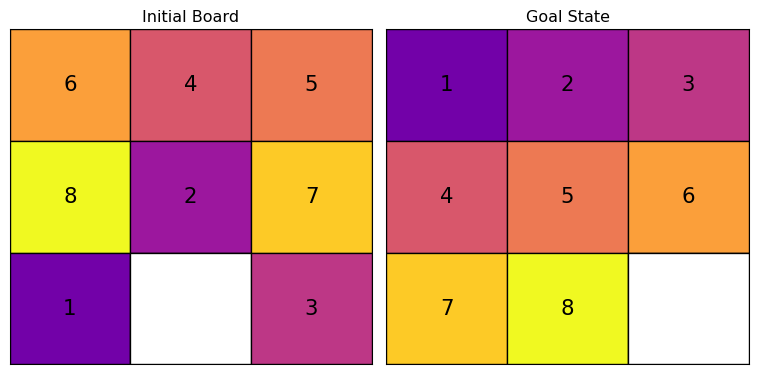

## Search Tree

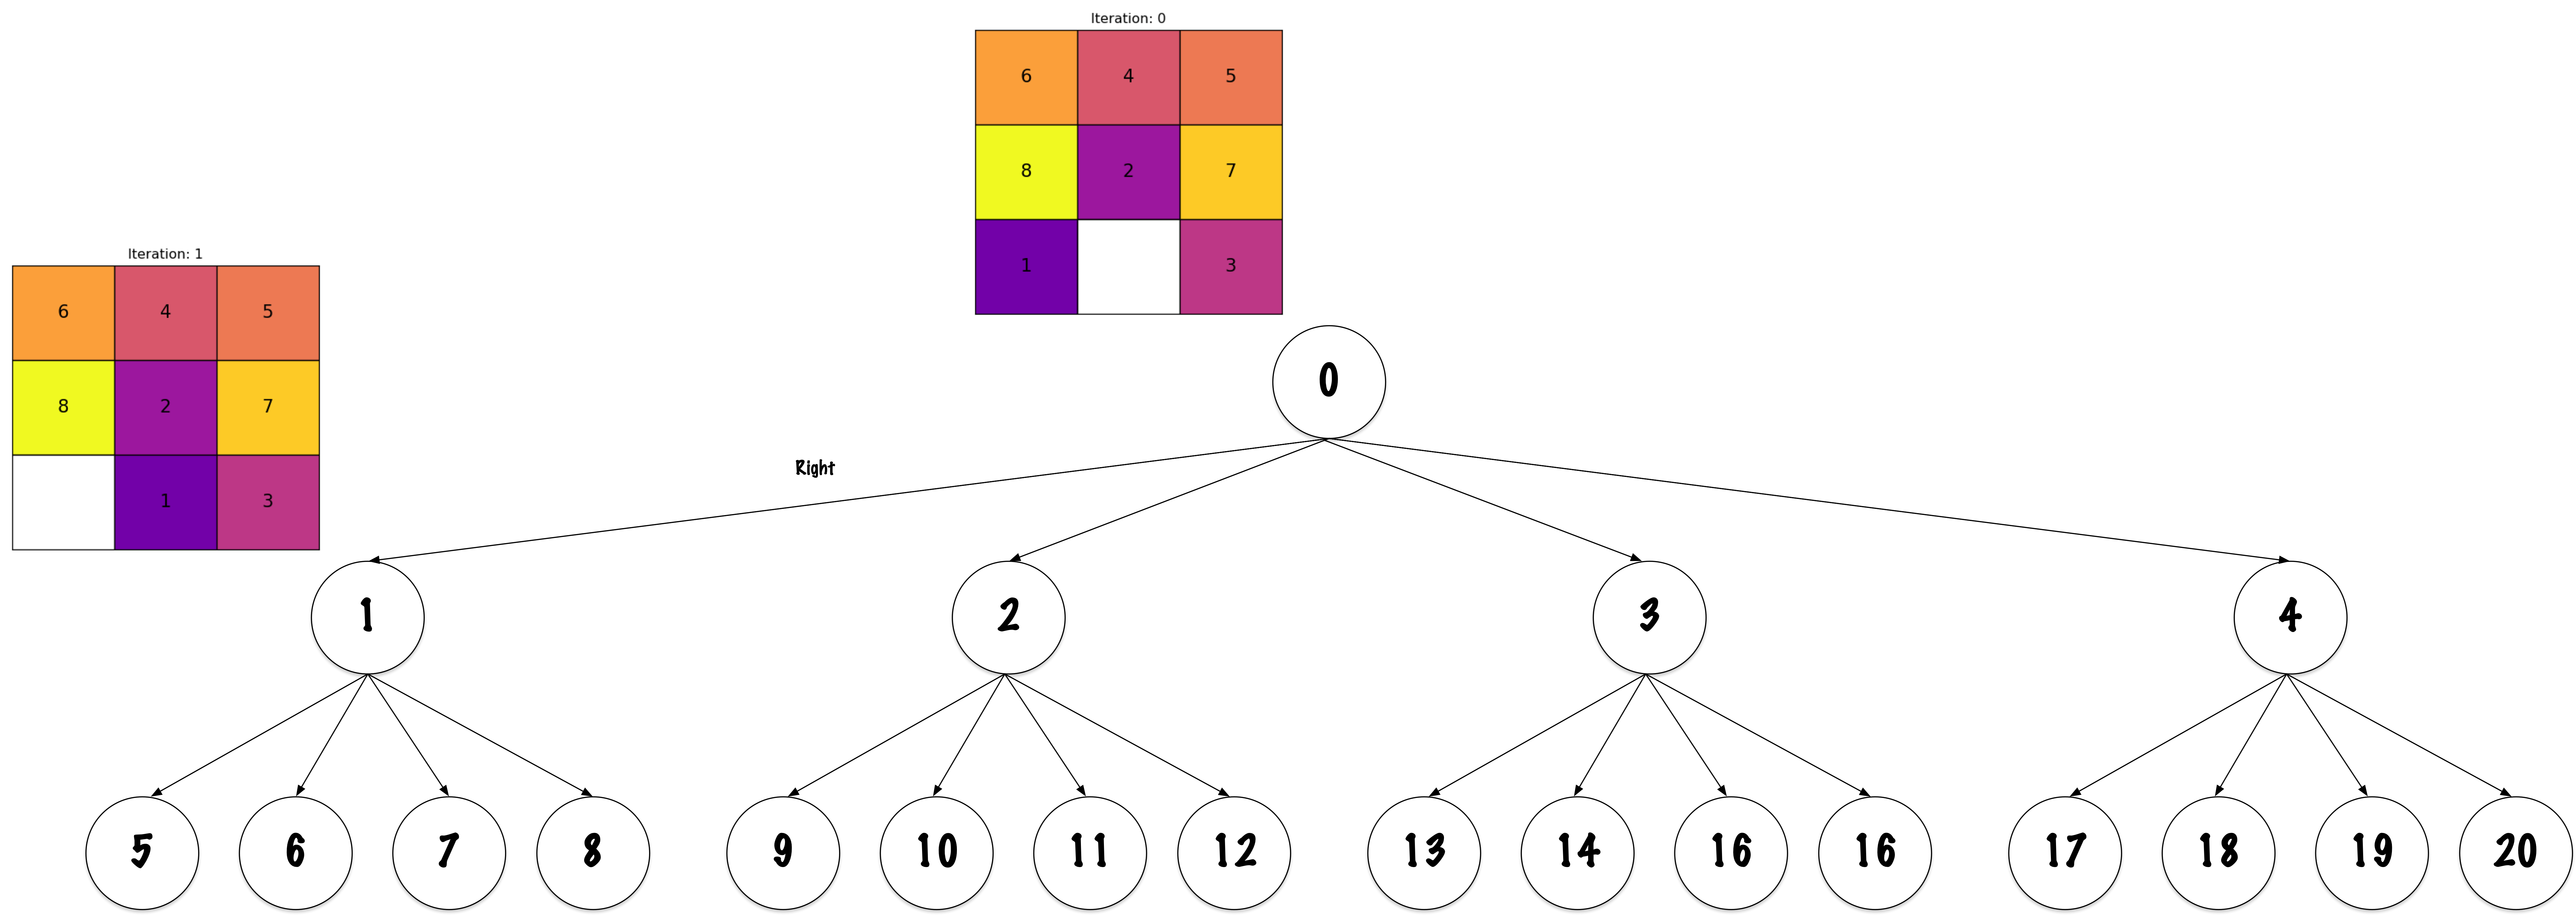

A **search tree** is a *conceptual tree structure* where **nodes**
represent *states* in a **state space**, and **edges** represent
possible **actions**, facilitating systematic exploration to find a
**path** from an **initial state** to a **goal state**.

The search algorithms we examine today construct a search tree, where
each node represents a state within the state space and each edge
represents an action.

It is important to distinguish between the search tree and the state
space, which can be depicted as a graph. The structure of the search
tree varies depending on the algorithm employed to address the search
problem.

## Search Tree



An example of a **search tree** for the **8-Puzzle**. The solution here
is incomplete.

## Frontier



Any state corresponding to a node in the search tree is considered
**reached**. **Frontier** nodes are those that have been **reached** but
have **not yet been expanded**. Above, there are **10 expanded nodes**
and **11 frontier nodes**, resulting in a total of 21 nodes that have
been **reached**.

## Frontier

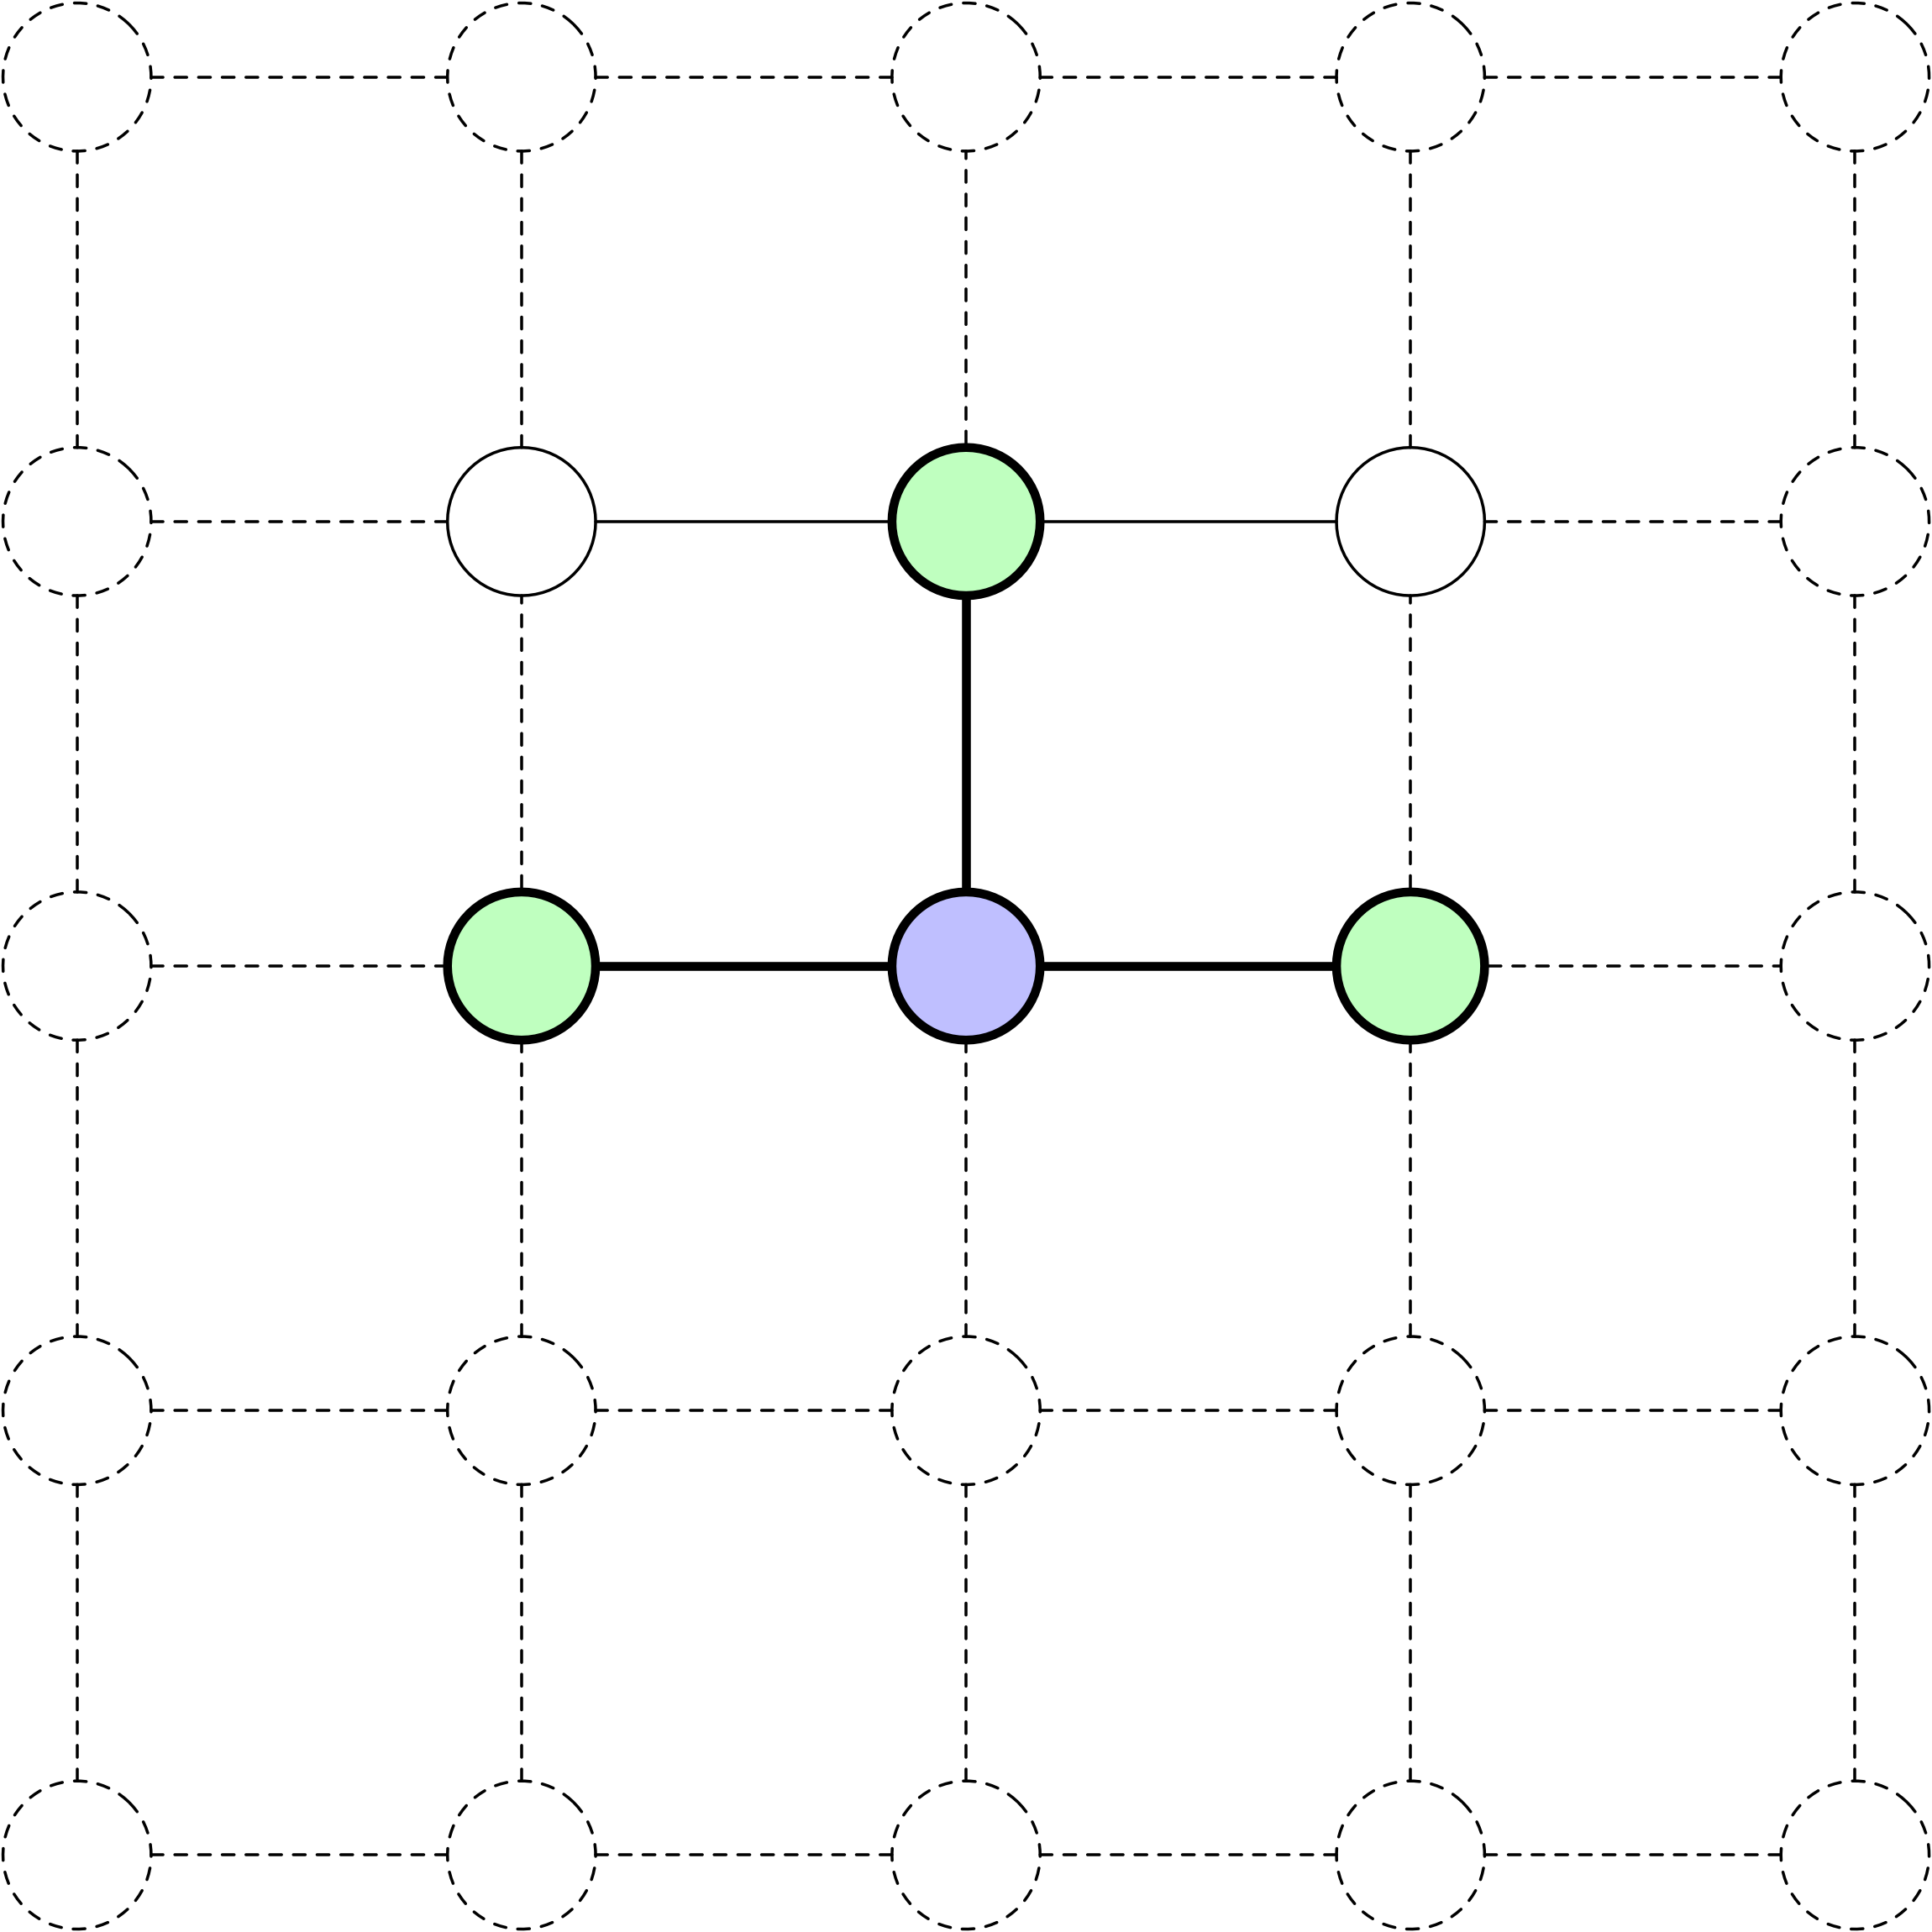

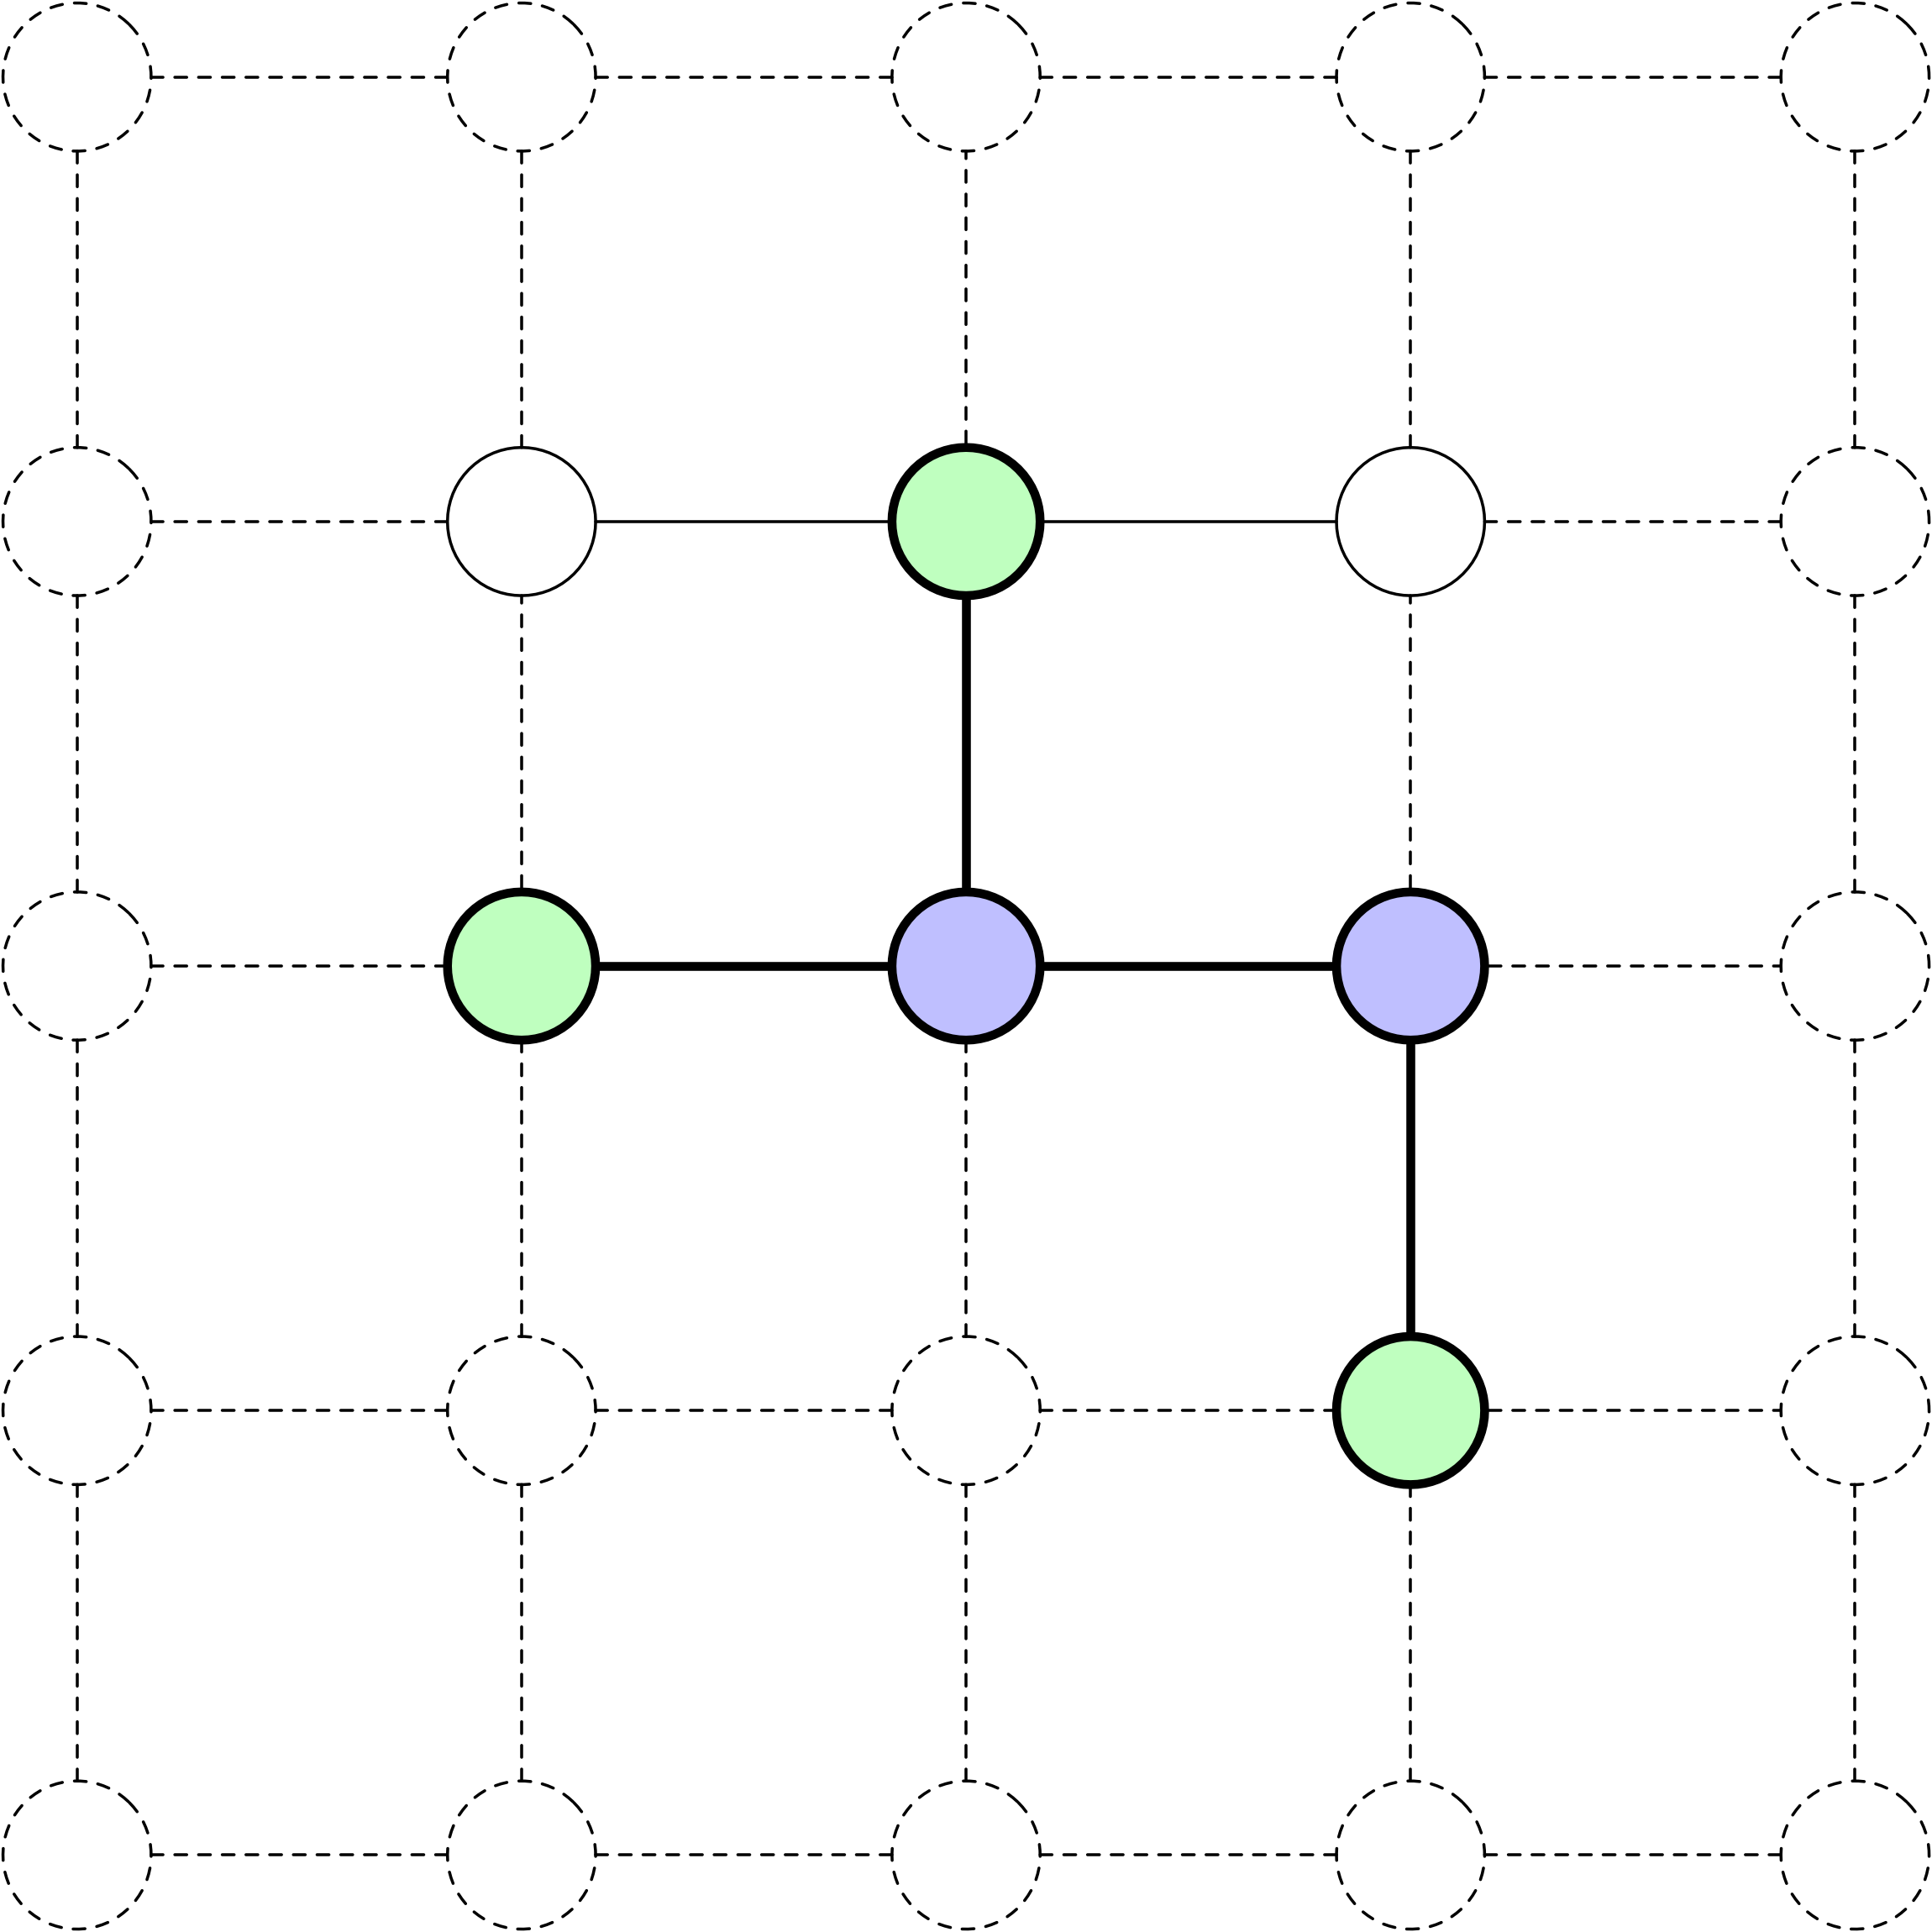

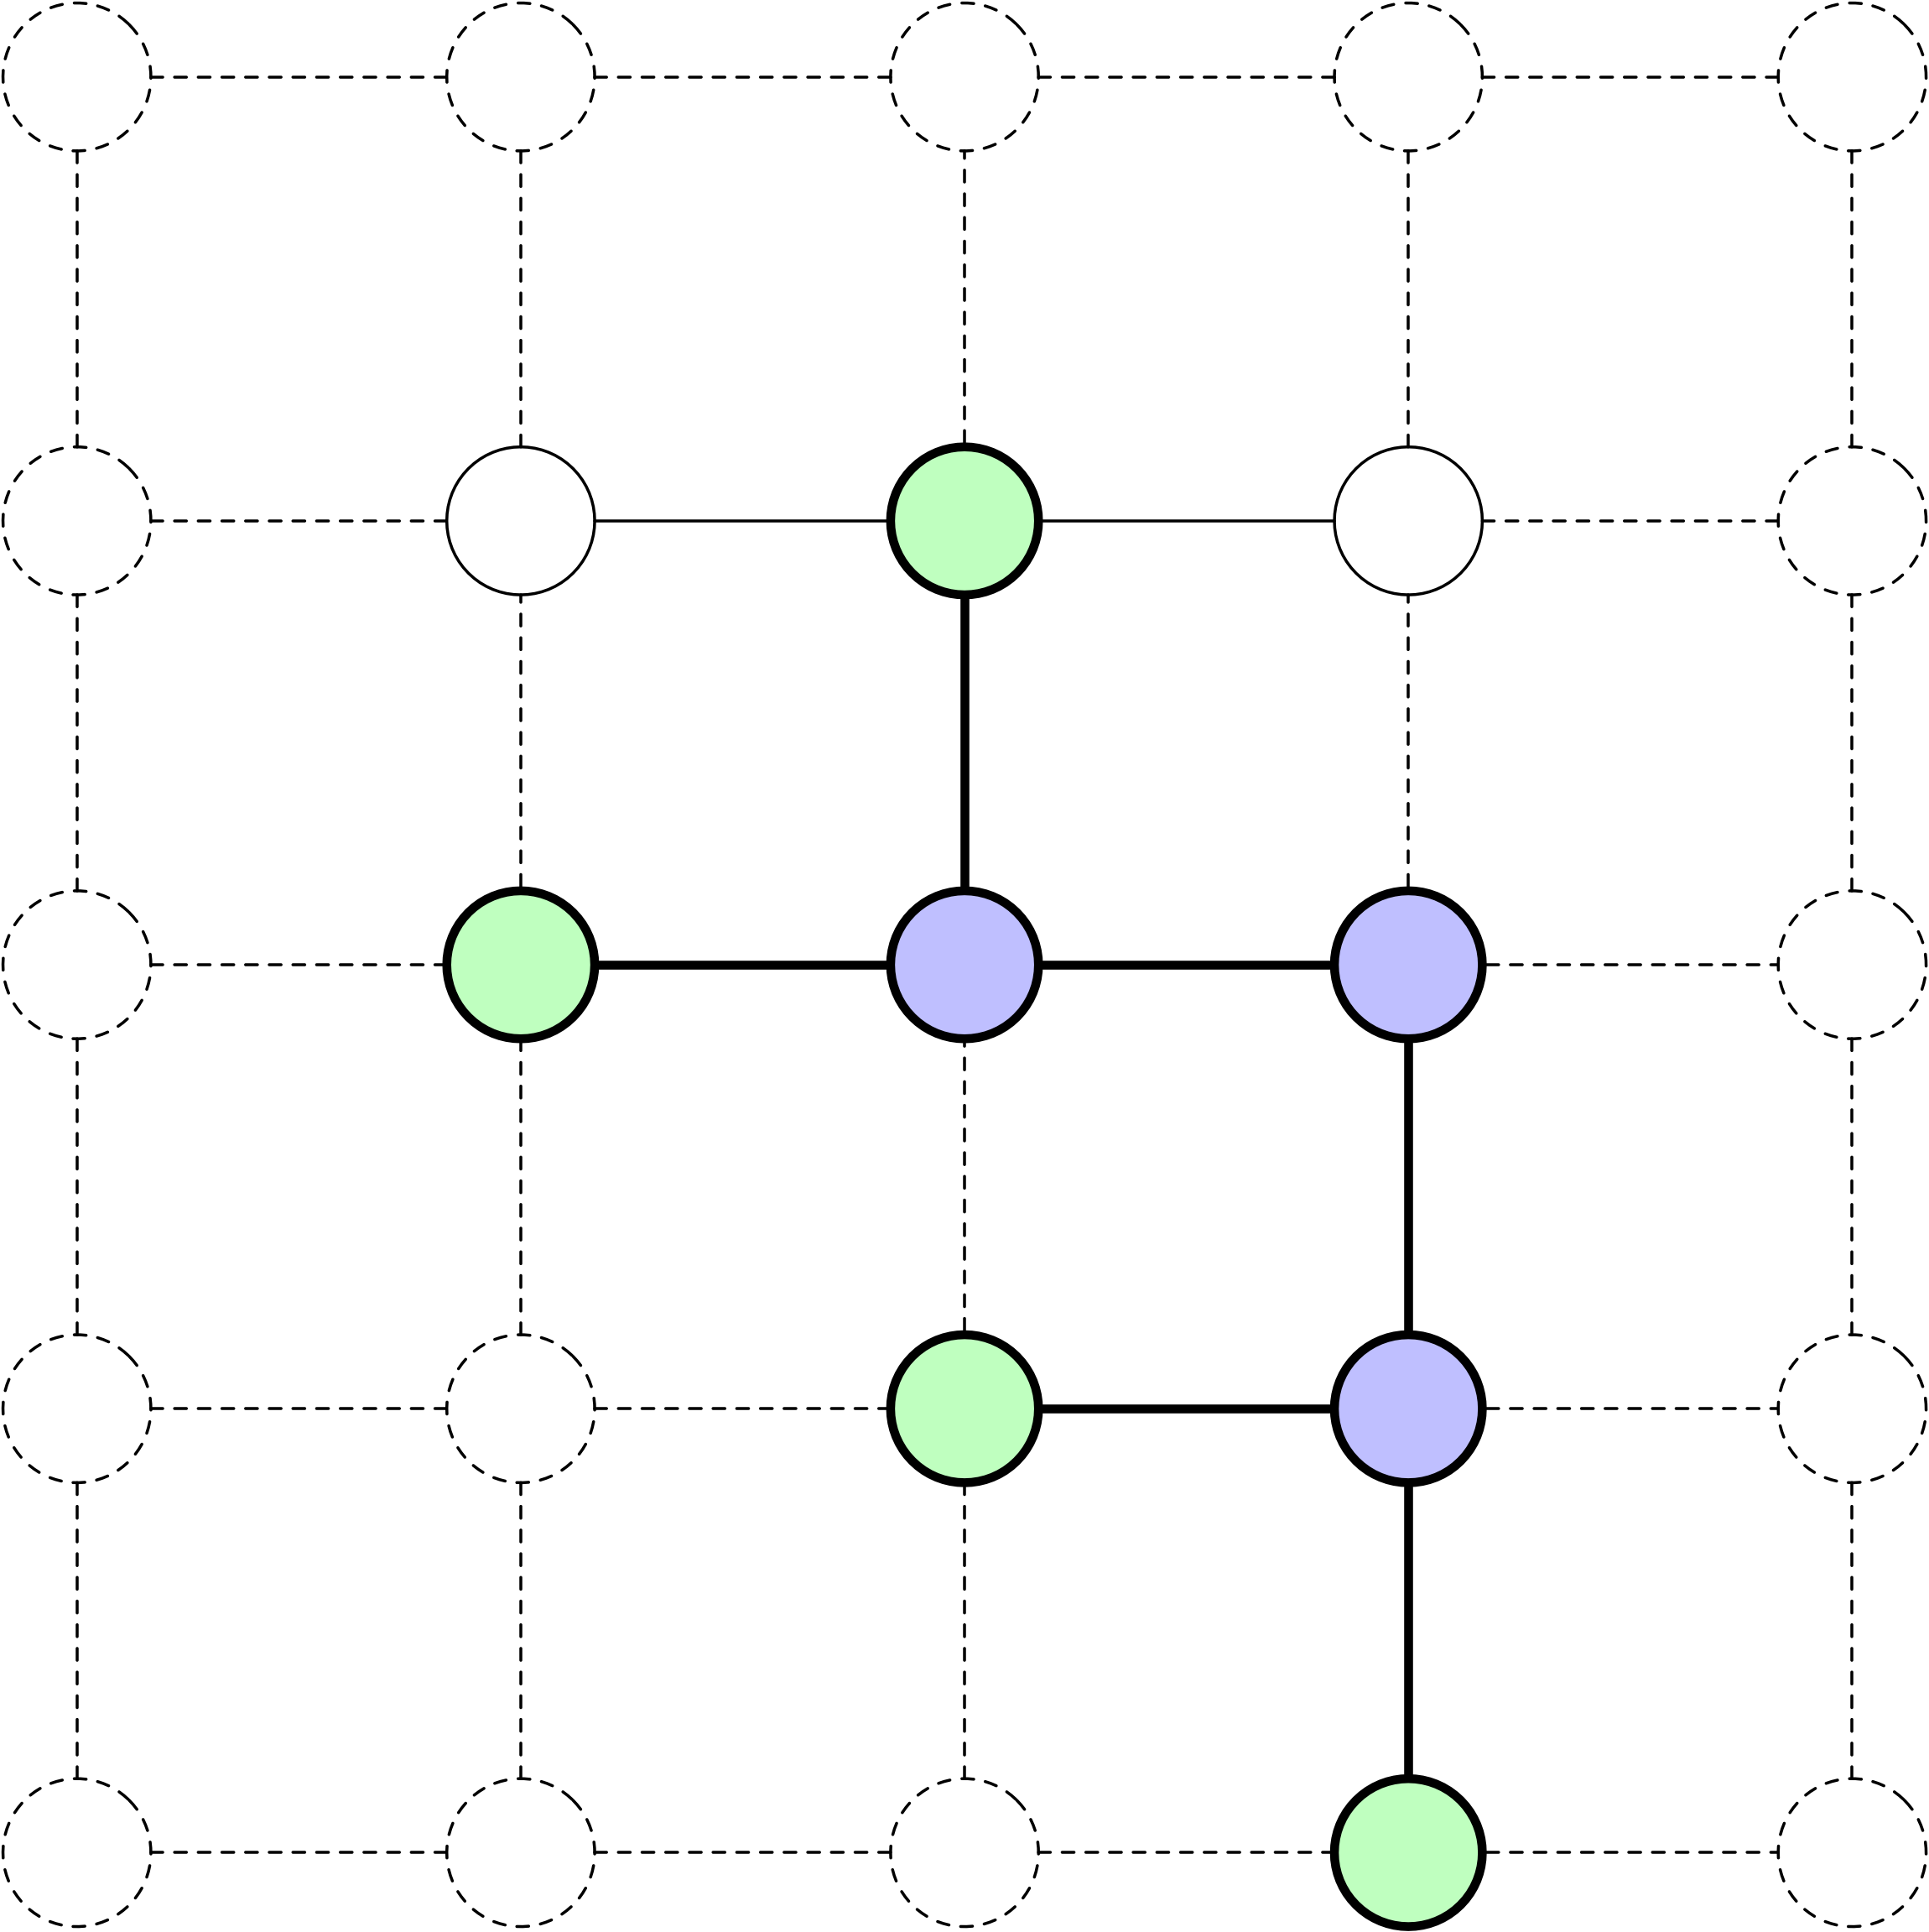

In the 8-Puzzle, four actions are possible: slide **left**, **right**,
**up**, or **down**. The search can be visualized on a grid: **purple
nodes**: expanded states, **green nodes**: frontier states (reached but
not expanded).

The diagrams correspond to the search tree presented on the previous
page. For example, the initial state can be expanded using three
actions: slide left, right, and up. Node (2, 3) can only be expanded by
sliding down, while node (3, 3) can be expanded by sliding left and
down.

## Frontier

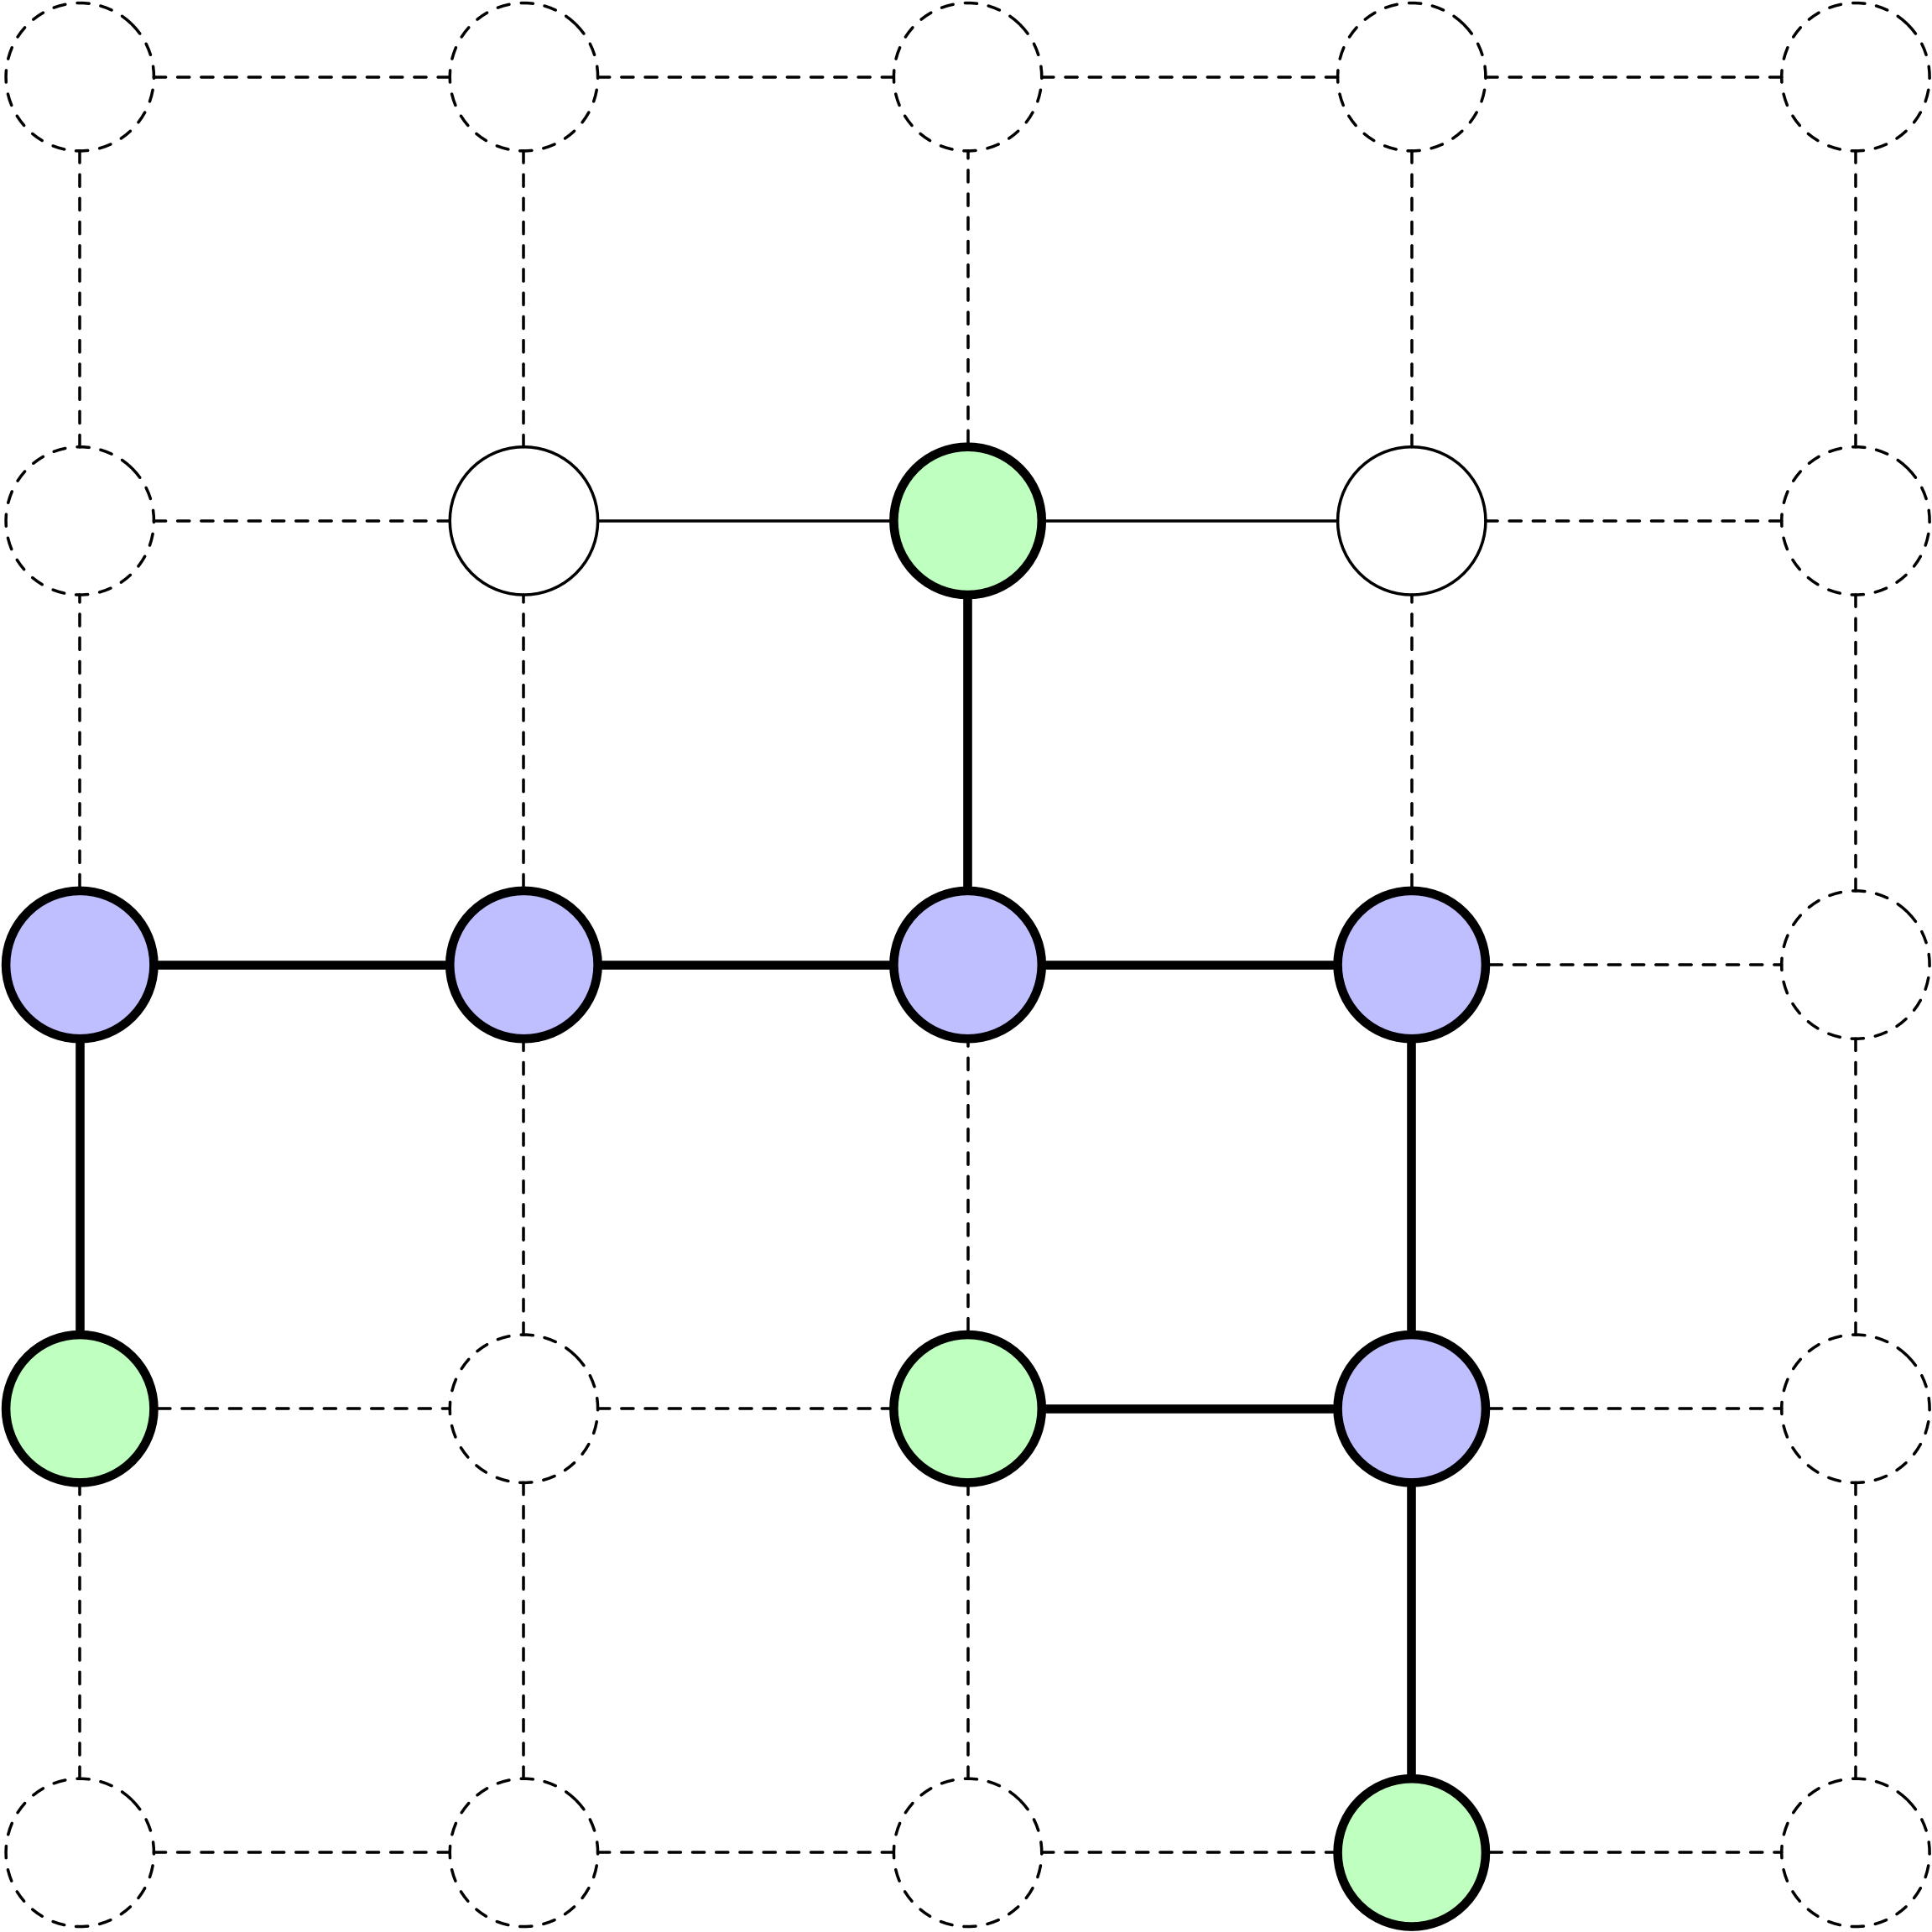

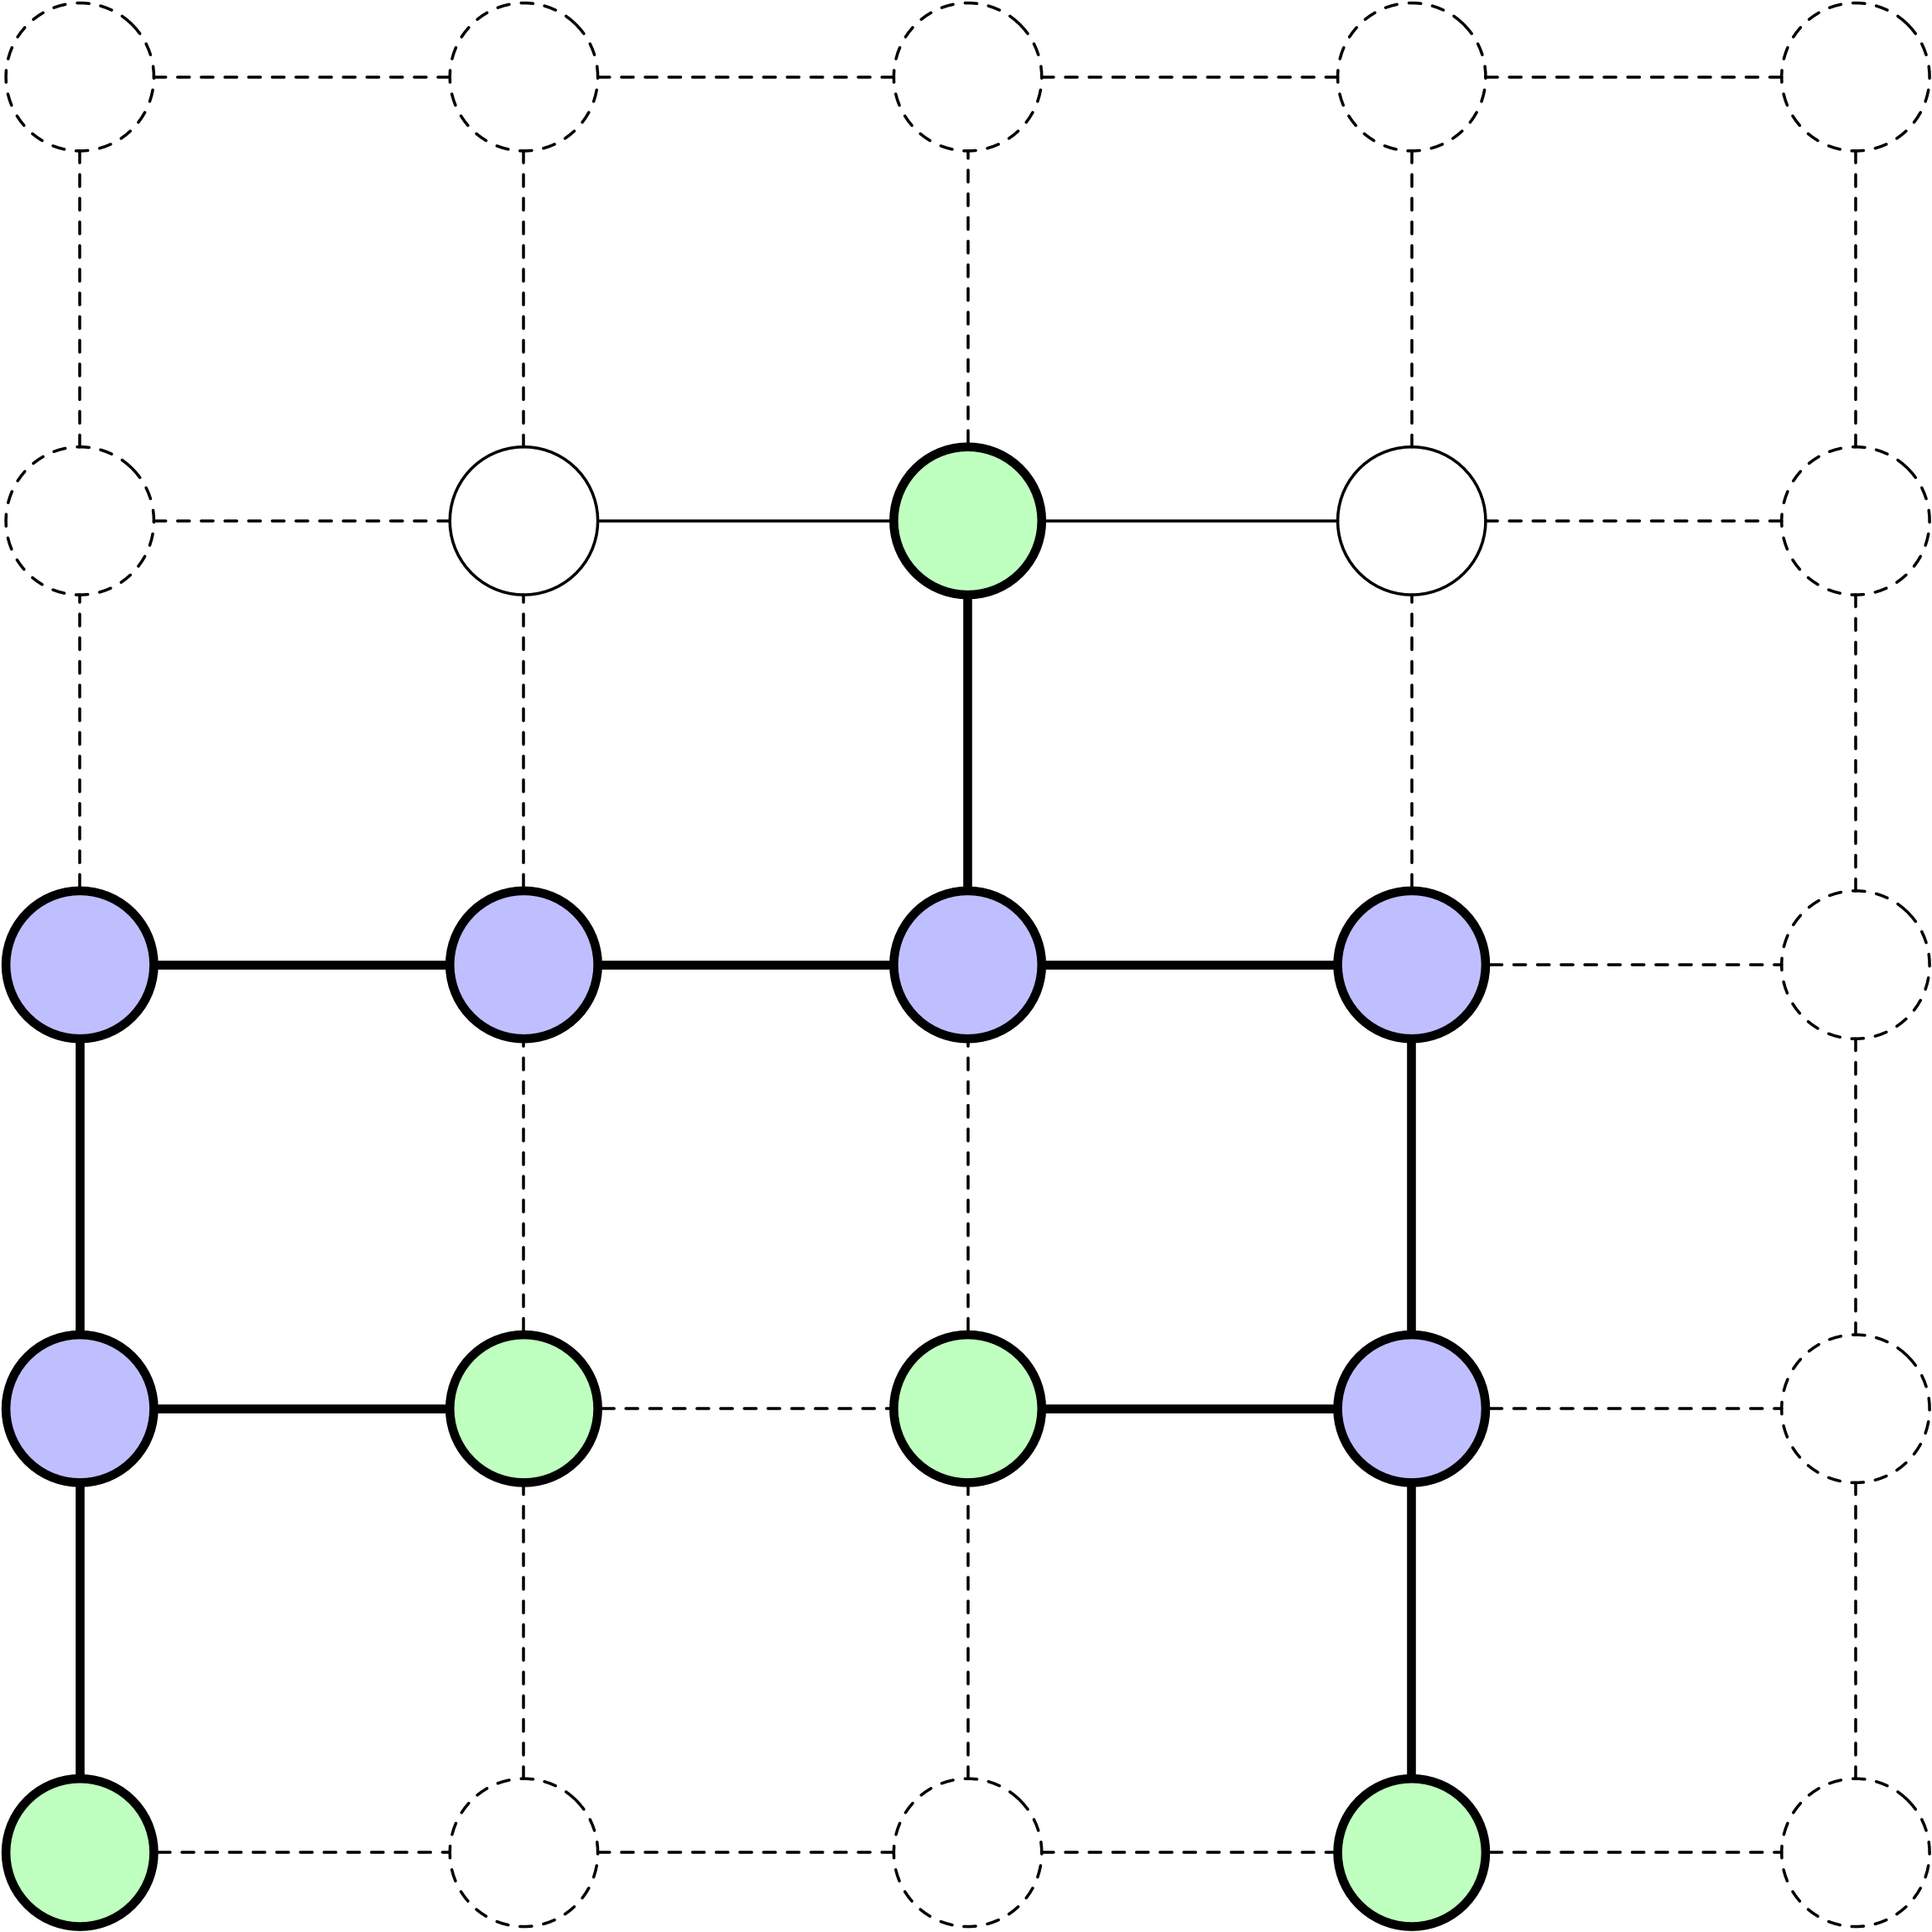

## `is_empty`

In [3]:
def is_empty(frontier):
    """Checks if the frontier is empty."""
    return len(frontier) == 0

## `is_goal`

In [4]:
def is_goal(state, goal_state):
    """Determines if a given state matches the goal state."""
    return state == goal_state

Auxilliary method.

## `expand`

In [5]:
def expand(state):
    """Generates successor states by moving the blank tile in all possible directions."""
    size = int(len(state) ** 0.5)  # Determine puzzle size (3 for 8-puzzle, 4 for 15-puzzle)
    idx = state.index(0)  # Find the index of the blank tile represented by 0
    x, y = idx % size, idx // size  # Convert index to (x, y) coordinates
    neighbors = []

    # Define possible moves: Left, Right, Up, Down
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dx, dy in moves:
        nx, ny = x + dx, y + dy
        # Check if the new position is within the puzzle boundaries
        if 0 <= nx < size and 0 <= ny < size:
            n_idx = ny * size + nx
            new_state = state.copy()
            # Swap the blank tile with the adjacent tile
            new_state[idx], new_state[n_idx] = new_state[n_idx], new_state[idx]
            neighbors.append(new_state)
    return neighbors

## `print_solution`

In [6]:
def print_solution(solution):
    """Prints the sequence of steps from the initial to the goal state."""
    size = int(len(solution[0]) ** 0.5)
    for step, state in enumerate(solution):
        print(f"Step {step}:")
        for i in range(size):
            row = state[i*size:(i+1)*size]
            print(' '.join(str(n) if n != 0 else ' ' for n in row))
        print()

## Breadth-first search

In [7]:
from collections import deque

**Breadth-first search (BFS)** employs a **queue** to manage the
frontier nodes, which are also known as the open list.

## Breadth-first search

In [8]:
def bfs(initial_state, goal_state):

    frontier = deque()  # Initialize the queue for BFS
    frontier.append((initial_state, []))  # Each element is a tuple: (state, path)

    explored = set()
    explored.add(tuple(initial_state))

    iterations = 0 # simply used to compare algorithms

    while not is_empty(frontier):
        current_state, path = frontier.popleft()

        if is_goal(current_state, goal_state):
            print(f"Number of iterations: {iterations}")
            return path + [current_state]  # Return the successful path

        iterations = iterations + 1

        for neighbor in expand(current_state):
            neighbor_tuple = tuple(neighbor)
            if neighbor_tuple not in explored:
                explored.add(neighbor_tuple)
                frontier.append((neighbor, path + [current_state]))

    return None  # No solution found

Using `tuple` makes states immutable and hashable, enabling storage in a
set.

## Depth-First Search

In [9]:
def dfs(initial_state, goal_state):

    frontier = [(initial_state, [])]  # Each element is a tuple: (state, path)

    explored = set()
    explored.add(tuple(initial_state))

    iterations = 0

    while not is_empty(frontier):
        current_state, path = frontier.pop()

        if is_goal(current_state, goal_state):
            print(f"Number of iterations: {iterations}")
            return path + [current_state]  # Return the successful path

        iterations = iterations + 1

        for neighbor in expand(current_state):
            neighbor_tuple = tuple(neighbor)
            if neighbor_tuple not in explored:
                explored.add(neighbor_tuple)
                frontier.append((neighbor, path + [current_state]))

    return None  # No solution found

## Remarks

-   **Breadth-first search (BFS)** identifies the optimal solution, 25
    moves, in 145,605 iterations.

-   **Depth-first search (DFS)** discovers a solution involving 1,157
    moves in 1,187 iterations.

How can solutions be discovered **more efficiently**?

Will **Depth-First Search (DFS)** invariably yield sub-optimal
solutions?

No, if the optimal solution lies along the path traversed by depth-first
search (DFS) within the search tree, then DFS will indeed identify the
optimal solution.

Is it possible for DFS to discover solutions superior to the optimal
solution?

Certainly not; such solutions would either be invalid (involving
impossible moves) or indicate an error in your estimation.

Does this imply that depth-first search (DFS) has no practical
applications?

When is it appropriate to use DFS?

Breadth-first search (BFS) expands its frontier systematically in all
directions, leading to rapid growth in memory requirements.

In contrast, the memory usage of DFS is constrained by the number of
moves needed to reach its backtracking points or the path length of the
first solution found. In all scenarios, DFS continues expanding the
frontier in one direction.

In certain applications where all possible solutions must be explored,
the entire search space must be traversed. Using BFS in these cases
would be prohibitively expensive in terms of memory. However, DFS can
explore the entire space with minimal memory usage.

The programming language Prolog includes a built-in backtracking
algorithm that enumerates all possible solutions. Backtracking is a
memory-efficient variant of DFS.

Depth-limited and iterative deepening search would be alternative
uninformed search algorithms.

Finding solutions more efficiently requires domain knowledge.

# Informed Search

## Heuristic Search

Informed search algorithms utilize **domain-specific knowledge**
regarding the goal state’s location.

## Heuristic Search

Let $f(n)$ be a **heuristic function** that estimates the **cost of the
cheapest path** from the current state or node $n$ to the goal.

This approach is termed **best-first search**.

## Heuristic Search

In **route-finding problems**, one might employ the straight-line
distance from the current node to the destination as a heuristic.
Although an actual path may not exist along that straight line, the
algorithm will prioritize expanding the node closest to the destination
(goal) based on this straight-line measurement.

## Implementation

-   How can the existing **breadth-first** and **depth-first search**
    algorithms be modified to implement **best-first search**?

    -   This can be achieved by employing a **priority queue**, which is
        sorted according to the values of the **heuristic function**
        $h(n)$.

. . .

In [10]:
import heapq

## Remark

**Breadth-first** search can be interpreted as a form of **best-first
search**, where the heuristic function $f(n)$ is defined as the **depth
of the node within the search tree**, corresponding to the path length.

Is this solution viable? The answer is nuanced. It is useful for
examining the properties of the algorithm, but using a queue will likely
provide a more efficient implementation.

Can you think of a way to implement depth-first-search as a
best-first-search?

## $A^\star$

$A^\star$ (a-star) is the **most common informed search**.

$$
    f(n) = g(n) + h(n)
$$

where

-   $g(n)$ is the path cost from the *initial state* to $n$.
-   $h(n)$ is an **estimate** of the cost of the shortest path from $n$
    to the *goal state*.

Hart, Nilsson, and Raphael (1968)

## Admissibility

-   $A^\star$ **guarantees a solution** if one exists.
-   Cost optimality requires an **admissible heuristic**.
-   An **admissible heuristic** *never overestimates* the goal cost.

What would happen if a heuristic were to overestimate the cost of the
shortest path from $n$ to the goal?

## 8-Puzzle

Can you think of a heuristic function, $h(n)$, for the 8-Puzzle?

## Misplaced Tiles Distance

In [11]:
def  misplaced_tiles_distance(state, goal_state):

    # Count the number of misplaced tiles
    misplaced_tiles = sum(1 for s, g in zip(state, goal_state) if s != g and s != 0)
    
    return misplaced_tiles

Is this heuristic admissible?

## 8-Puzzle

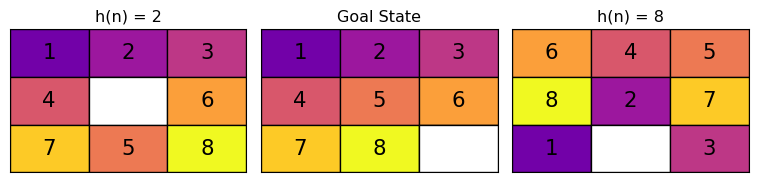

## Best-First Search

In [13]:
def best_first_search(initial_state, goal_state):

    frontier = []  # Initialize the priority queue
    initial_h = misplaced_tiles_distance(initial_state, goal_state)
    # Push the initial state with its heuristic value onto the queue
    heapq.heappush(frontier, (initial_h, 0, initial_state, []))  # (f(n), g(n), state, path)

    explored = set()

    iterations = 0

    while not is_empty(frontier):
        f, g, current_state, path = heapq.heappop(frontier)

        if is_goal(current_state, goal_state):
            print(f"Number of iterations: {iterations}")
            return path + [current_state]  # Return the successful path

        iterations = iterations + 1

        explored.add(tuple(current_state))

        for neighbor in expand(current_state):
            if tuple(neighbor) not in explored:
                new_g = g + 1  # Increment the path cost
                h = misplaced_tiles_distance(neighbor, goal_state)
                new_f = new_g + h  # Calculate the new total cost
                # Push the neighbor state onto the priority queue
                heapq.heappush(frontier, (new_f, new_g, neighbor, path + [current_state]))
                explored.add(tuple(neighbor))  # Mark neighbor as explored

    return None  # No solution found

## Simple Case

Number of iterations: 2

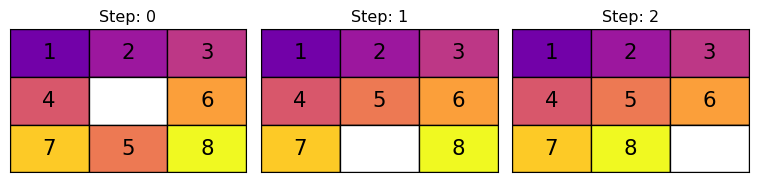

In [15]:
initial_state_8 = [1, 2, 3,
                   4, 0, 6,
                   7, 5, 8]
goal_state_8 = [1, 2, 3,
                4, 5, 6,
                7, 8, 0]

best_first_search(initial_state_8, goal_state_8)

Number of iterations: 2

[[1, 2, 3, 4, 0, 6, 7, 5, 8],
 [1, 2, 3, 4, 5, 6, 7, 0, 8],
 [1, 2, 3, 4, 5, 6, 7, 8, 0]]

## Challenging Case

In [16]:
initial_state_8 = [6, 4, 5,
                   8, 2, 7,
                   1, 0, 3]
goal_state_8 = [1, 2, 3,
                4, 5, 6,
                7, 8, 0]

print("Solving 8-puzzle with best_first_search...")

solution_8_bfs = best_first_search(initial_state_8, goal_state_8)

if solution_8_bfs:
    print(f"Best_first_search Solution found in {len(solution_8_bfs) - 1} moves:")
    print_solution(solution_8_bfs)
else:
    print("No solution found for 8-puzzle using best_first_search.")

Solving 8-puzzle with best_first_search...
Number of iterations: 29005
Best_first_search Solution found in 25 moves:
Step 0:
6 4 5
8 2 7
1   3

Step 1:
6 4 5
8 2 7
  1 3

Step 2:
6 4 5
  2 7
8 1 3

Step 3:
6 4 5
2   7
8 1 3

Step 4:
6   5
2 4 7
8 1 3

Step 5:
  6 5
2 4 7
8 1 3

Step 6:
2 6 5
  4 7
8 1 3

Step 7:
2 6 5
4   7
8 1 3

Step 8:
2 6 5
4 1 7
8   3

Step 9:
2 6 5
4 1 7
  8 3

Step 10:
2 6 5
  1 7
4 8 3

Step 11:
2 6 5
1   7
4 8 3

Step 12:
2 6 5
1 7  
4 8 3

Step 13:
2 6 5
1 7 3
4 8  

Step 14:
2 6 5
1 7 3
4   8

Step 15:
2 6 5
1   3
4 7 8

Step 16:
2   5
1 6 3
4 7 8

Step 17:
2 5  
1 6 3
4 7 8

Step 18:
2 5 3
1 6  
4 7 8

Step 19:
2 5 3
1   6
4 7 8

Step 20:
2   3
1 5 6
4 7 8

Step 21:
  2 3
1 5 6
4 7 8

Step 22:
1 2 3
  5 6
4 7 8

Step 23:
1 2 3
4 5 6
  7 8

Step 24:
1 2 3
4 5 6
7   8

Step 25:
1 2 3
4 5 6
7 8  


## 8-Puzzle

In [17]:
def manhattan_distance(state, goal_state):
    distance = 0
    size = int(len(state) ** 0.5)
    for num in range(1, len(state)):
        idx1 = state.index(num)
        idx2 = goal_state.index(num)
        x1, y1 = idx1 % size, idx1 // size
        x2, y2 = idx2 % size, idx2 // size
        distance += abs(x1 - x2) + abs(y1 - y2)
    return distance

Calculates the **Manhattan distance** heuristic for a given state. Is
this heuristic **admissible**?

## 8-Puzzle

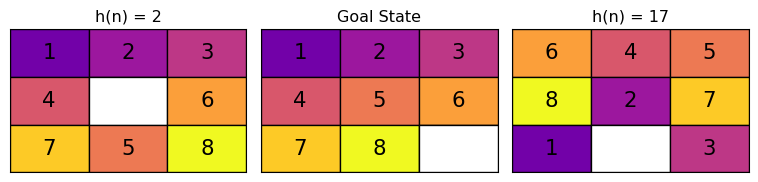

## 8-Puzzle

-   Compare **Manhattan** vs. **Misplaced Tiles** heuristics.
-   Which is more effective?
-   Significant run time differences?

## 8-Puzzle

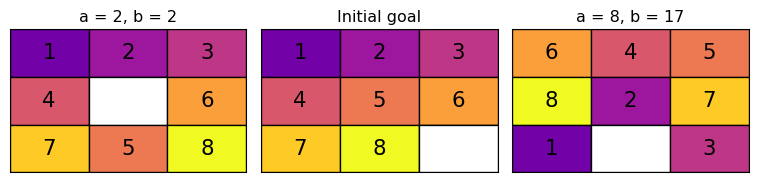

where

-   **a** = misplaced tiles distance
-   **b** = Manathan distance

## 8-Puzzle

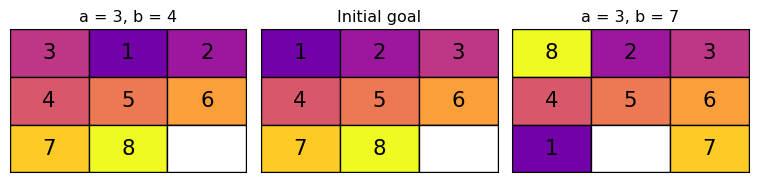

where

-   **a** = misplaced tiles distance
-   **b** = Manathan distance

`misplaced_tiles_distance` does not take into account how far a tile is
from its expected final location, whereas `manhattan_distance` does.

Thus, one can expect the algorithm using the Manhattan distance to
select the next node to explore more wisely.

## Best-First Search

In [21]:
def best_first_search_revised(initial_state, goal_state):

    frontier = []  # Initialize the priority queue
    initial_h = manhattan_distance(initial_state, goal_state)
    # Push the initial state with its heuristic value onto the queue
    heapq.heappush(frontier, (initial_h, 0, initial_state, []))  # (f(n), g(n), state, path)

    explored = set()

    iterations = 0

    while not is_empty(frontier):
        f, g, current_state, path = heapq.heappop(frontier)

        if is_goal(current_state, goal_state):
            print(f"Number of iterations: {iterations}")
            return path + [current_state]  # Return the successful path

        iterations = iterations + 1

        explored.add(tuple(current_state))

        for neighbor in expand(current_state):
            if tuple(neighbor) not in explored:
                new_g = g + 1  # Increment the path cost
                h = manhattan_distance(neighbor, goal_state)
                new_f = new_g + h  # Calculate the new total cost
                # Push the neighbor state onto the priority queue
                heapq.heappush(frontier, (new_f, new_g, neighbor, path + [current_state]))
                explored.add(tuple(neighbor))  # Mark neighbor as explored

    return None  # No solution found

## Simple Case

Number of iterations: 2

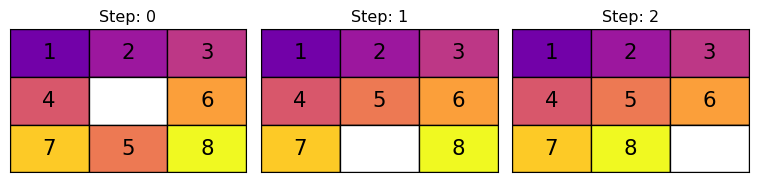

In [23]:
initial_state_8 = [1, 2, 3,
                    4, 0, 6,
                    7, 5, 8]
goal_state_8 = [1, 2, 3,
                4, 5, 6,
                7, 8, 0]

best_first_search_revised(initial_state_8, goal_state_8)

Number of iterations: 2

[[1, 2, 3, 4, 0, 6, 7, 5, 8],
 [1, 2, 3, 4, 5, 6, 7, 0, 8],
 [1, 2, 3, 4, 5, 6, 7, 8, 0]]

## Challenging Case

In [24]:
initial_state_8 = [6, 4, 5,
                   8, 2, 7,
                   1, 0, 3]
goal_state_8 = [1, 2, 3,
                4, 5, 6,
                7, 8, 0]

print("Solving 8-puzzle with best_first_search...")

solution_8_bfs = best_first_search_revised(initial_state_8, goal_state_8)

if solution_8_bfs:
    print(f"Best_first_search Solution found in {len(solution_8_bfs) - 1} moves:")
    print_solution(solution_8_bfs)
else:
    print("No solution found for 8-puzzle using best_first_search.")

Solving 8-puzzle with best_first_search...
Number of iterations: 2255
Best_first_search Solution found in 25 moves:
Step 0:
6 4 5
8 2 7
1   3

Step 1:
6 4 5
8 2 7
  1 3

Step 2:
6 4 5
  2 7
8 1 3

Step 3:
6 4 5
2   7
8 1 3

Step 4:
6   5
2 4 7
8 1 3

Step 5:
  6 5
2 4 7
8 1 3

Step 6:
2 6 5
  4 7
8 1 3

Step 7:
2 6 5
4   7
8 1 3

Step 8:
2 6 5
4 1 7
8   3

Step 9:
2 6 5
4 1 7
  8 3

Step 10:
2 6 5
  1 7
4 8 3

Step 11:
2 6 5
1   7
4 8 3

Step 12:
2 6 5
1 7  
4 8 3

Step 13:
2 6 5
1 7 3
4 8  

Step 14:
2 6 5
1 7 3
4   8

Step 15:
2 6 5
1   3
4 7 8

Step 16:
2   5
1 6 3
4 7 8

Step 17:
2 5  
1 6 3
4 7 8

Step 18:
2 5 3
1 6  
4 7 8

Step 19:
2 5 3
1   6
4 7 8

Step 20:
2   3
1 5 6
4 7 8

Step 21:
  2 3
1 5 6
4 7 8

Step 22:
1 2 3
  5 6
4 7 8

Step 23:
1 2 3
4 5 6
  7 8

Step 24:
1 2 3
4 5 6
7   8

Step 25:
1 2 3
4 5 6
7 8  


## 1000 Experiments

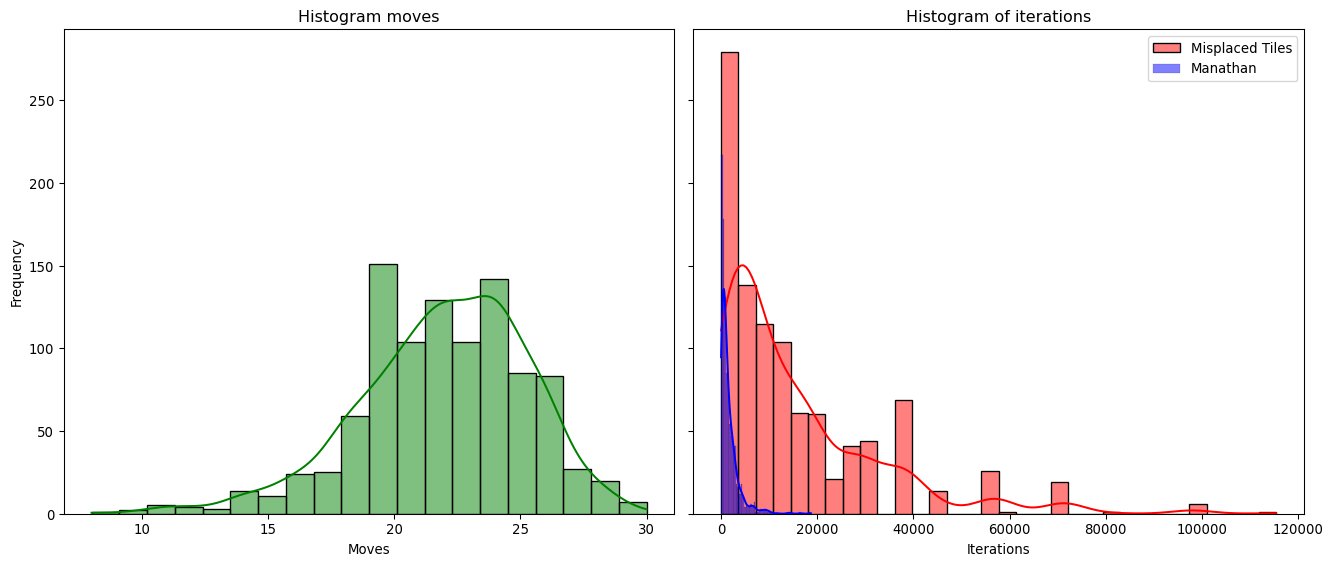

## Scatter Plot (Manathan)

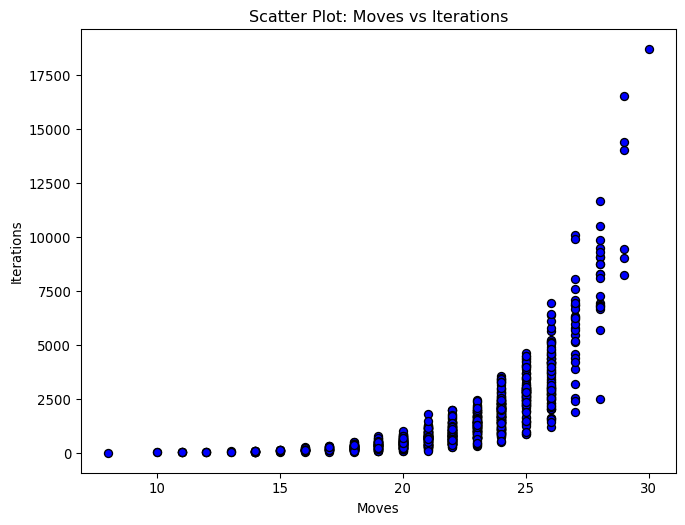

## Remarks

-   **Breadth-first search (BFS)** identifies the optimal solution, 25
    moves, in 145,605 iterations.

-   **Depth-first search (DFS)** discovers a solution involving 1,157
    moves in 1,187 iterations.

-   **Best-First Search ** using the Manathan distance identifies the
    optimal solution, 25 moves, in 2,255 iterations.

## Measuring Performance

-   **Completeness**: Does the algorithm **ensure** that a solution will
    be found if one exists, and accurately indicate failure when no
    solution exists?

-   **Cost Optimality**: Does the algorithm identify the (a) solution
    with the **lowest path cost** among all possible solutions?

-   Are all three algorithms complete? What are the necessary
    conditions?

-   Do all three algorithms guarantee cost optimality?

## Measuring Performance

-   **Time Complexity**: How does the **time** required by the algorithm
    scale with respect to the **number of states** and **actions**?

-   **Space Complexity**: How does the **space** required by the
    algorithm scale with respect to the **number of states** and
    **actions**?

Alternatively, complexity can be evaluated based on the **depth** ($d$)
and **branching factor** ($b$) of the search tree, instead of the number
of states (nodes) and actions (edges) in the state space.

-   What is the time and space complexity of breadth-first-search?
    $\mathcal{O}(b^d)$

# Prologue

## Summary

-   Informed Search and Heuristics
    -   Best-First Search
-   Implementations

-   **Informed Search and Heuristics:**
    -   Introduced the concept of **heuristic functions** (`h(n)`) to
        estimate costs.
    -   **Best-First Search:**
        -   Uses heuristics to prioritize nodes that seem closer to the
            goal.
        -   Implemented with a priority queue sorted by estimated cost.
    -   **Manhattan Distance Heuristic:**
        -   Calculates the sum of the distances of tiles from their goal
            positions.
        -   Used in the 8-Puzzle to guide the search more efficiently.
-   **Comparative Analysis:**
    -   **BFS:** Optimal solution in 145,605 iterations (25 moves).
    -   **DFS:** Suboptimal solution in 1,187 iterations (1,157 moves).
    -   **Best-First Search:** Optimal solution in 2,255 iterations (25
        moves).
    -   Demonstrated that informed search algorithms can find optimal
        solutions more efficiently.

## Next lecture

-   We will examine additional search algorithms.

## References

Hart, Peter E., Nils J. Nilsson, and Bertram Raphael. 1968.
“<span class="nocase">A Formal Basis for the Heuristic Determination of
Minimum Cost Paths</span>.” *IEEE Transactions on Systems Science and
Cybernetics* 4 (2): 100–107. <https://doi.org/10.1109/tssc.1968.300136>.

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa